In [54]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# load the data and split the data

In [55]:
male_path = 'face_data/1/'
female_path = 'face_data/0/'

In [56]:
size = 50

In [57]:
ind_male_test = np.random.randint(low=0, high=300, size=size+10)
ind_male_test = np.unique(ind_male_test)
ind_male_test = ind_male_test[:size]
ind_male_test = np.sort(ind_male_test)
print(len(ind_male_test))
ind_female_test = np.random.randint(low=0, high=300, size=size+10)
ind_female_test = np.unique(ind_female_test)
ind_female_test = ind_female_test[:size]
ind_female_test = np.sort(ind_female_test)
print(len(ind_female_test))

50
50


In [58]:
male_img = []
for i in os.listdir(male_path):
    img = cv2.imread(male_path+i, cv2.IMREAD_COLOR)
    male_img.append(img.flatten())
male_img = np.array(male_img)
print(male_img.shape)

ind_male = np.zeros(300, dtype=int)
ind_male[ind_male_test] = 1
print(np.sum(ind_male))
ind_male = ind_male.astype('bool')
male_test_x = male_img[ind_male]
male_test_y = np.ones(male_test_x.shape[0])
male_train_x = male_img[~ind_male]
male_train_y = np.ones(male_train_x.shape[0])
print(male_test_x.shape)
print(male_test_y.shape)
print(male_train_x.shape)
print(male_train_y.shape)
# plt.imshow(cv2.cvtColor(male_test_x[0, :].reshape(48, 48, 3), cv2.COLOR_BGR2RGB))
# plt.show()

(300, 6912)
50
(50, 6912)
(50,)
(250, 6912)
(250,)


In [59]:
female_img = []
for i in os.listdir(female_path):
    img = cv2.imread(female_path+i, cv2.IMREAD_COLOR)
    female_img.append(img.flatten())
female_img = np.array(female_img)
print(female_img.shape)

ind_female = np.zeros(300, dtype=int)
ind_female[ind_female_test] = 1
print(np.sum(ind_female))
ind_female = ind_female.astype('bool')
female_test_x = female_img[ind_female]
female_test_y = np.zeros(female_test_x.shape[0])
female_train_x = female_img[~ind_female]
female_train_y = np.zeros(female_train_x.shape[0])
print(female_test_x.shape)
print(female_test_y.shape)
print(female_train_x.shape)
print(female_train_y.shape)
# plt.imshow(cv2.cvtColor(female_test_x[0, :].reshape(48, 48, 3), cv2.COLOR_BGR2RGB))
# plt.show()

(300, 6912)
50
(50, 6912)
(50,)
(250, 6912)
(250,)


In [60]:
test_x = np.vstack([male_test_x, female_test_x])
test_y = np.hstack([male_test_y, female_test_y])
print(test_x.shape)
print(test_y.shape)
# plt.imshow(cv2.cvtColor(test_x[0, :].reshape(48, 48, 3), cv2.COLOR_BGR2RGB))
# print(test_y[0])
# plt.show()

(100, 6912)
(100,)


In [61]:
train_x = np.vstack([male_train_x, female_train_x])
train_y = np.hstack([male_train_y, female_train_y])
print(train_x.shape)
print(train_y.shape)

(500, 6912)
(500,)


# Sklearn SVM

In [62]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
clf = SVC(kernel='linear', gamma='auto')
clf.fit(train_x, train_y)

SVC(gamma='auto', kernel='linear')

In [64]:
ind_svs = clf.support_

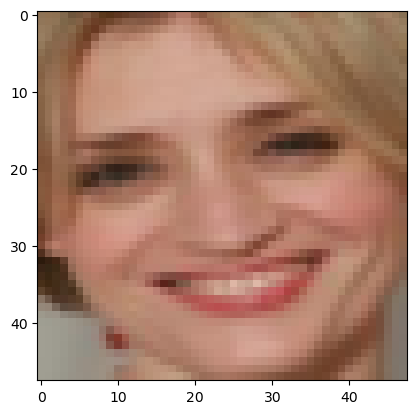

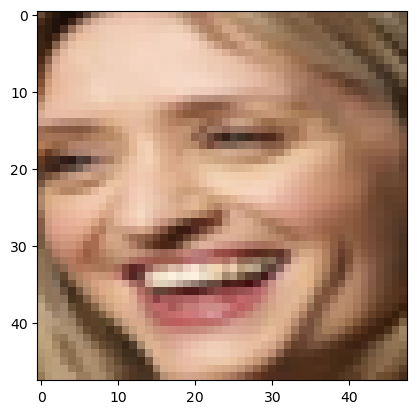

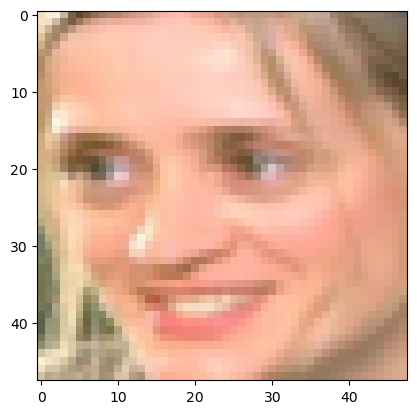

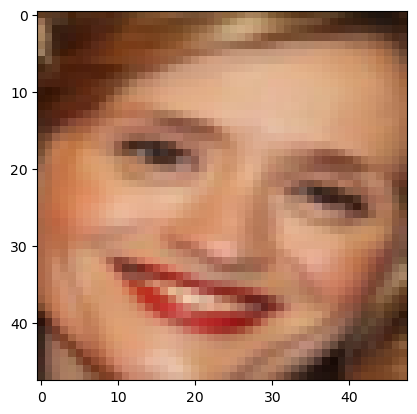

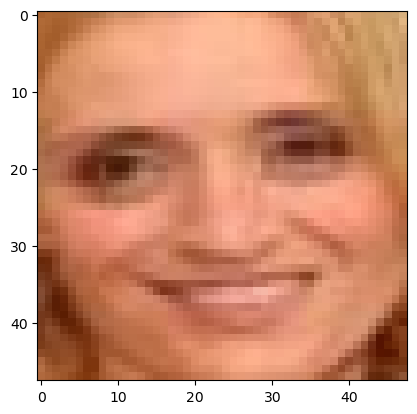

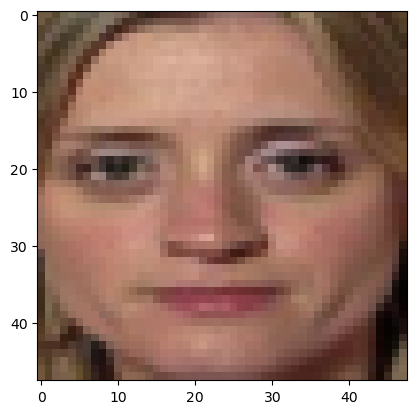

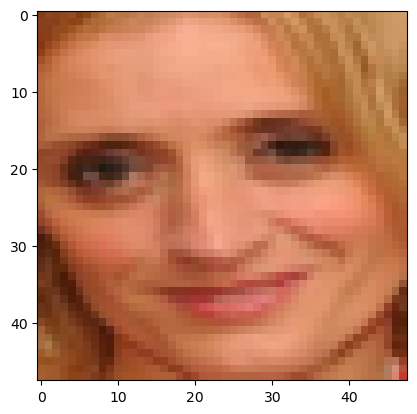

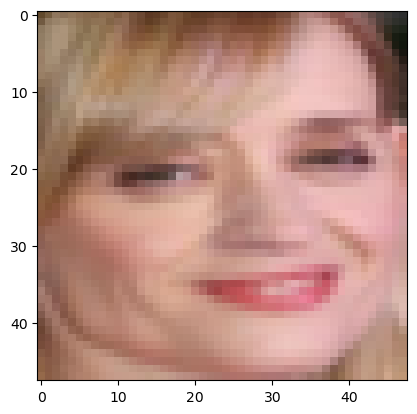

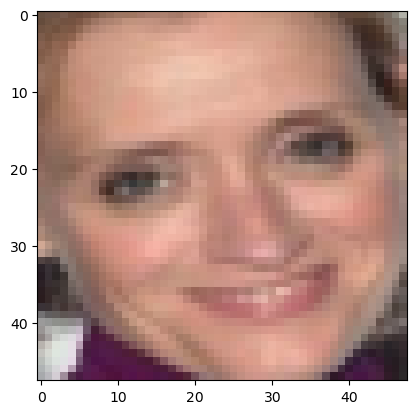

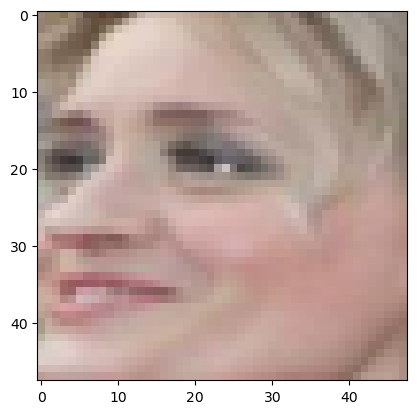

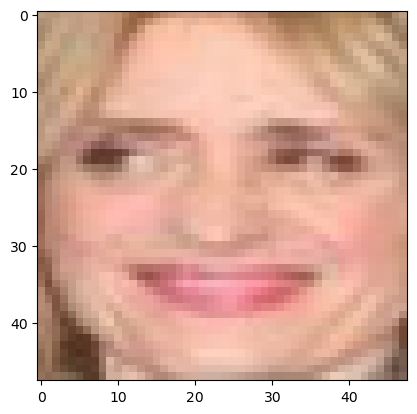

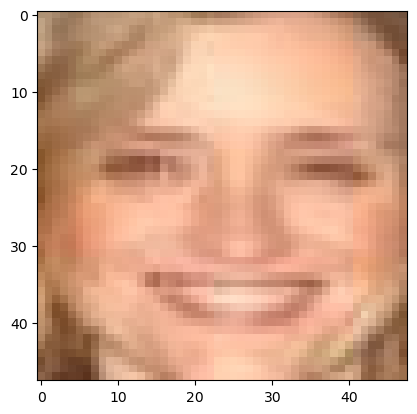

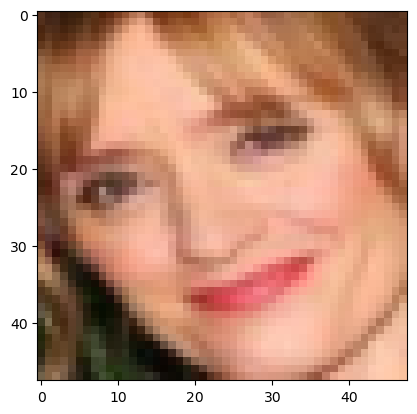

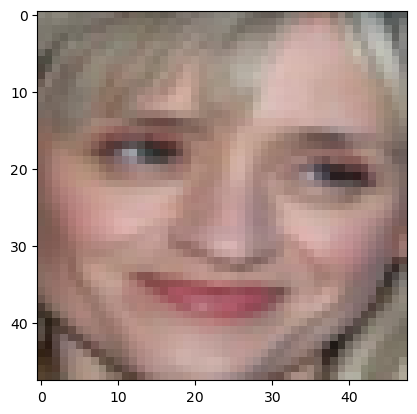

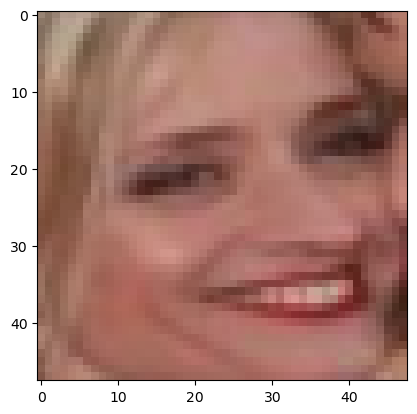

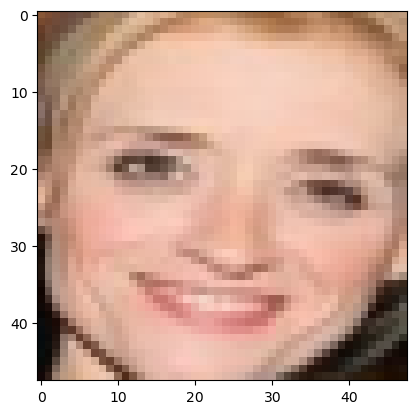

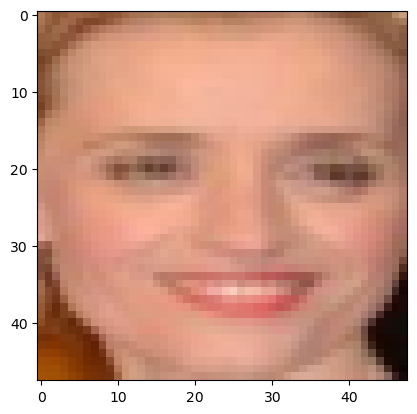

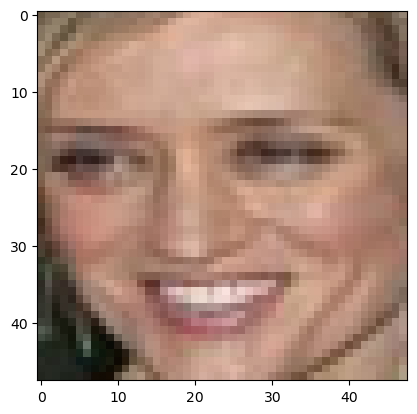

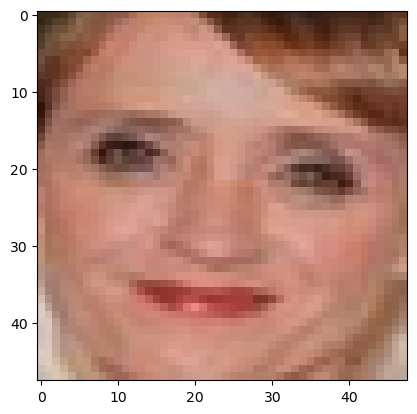

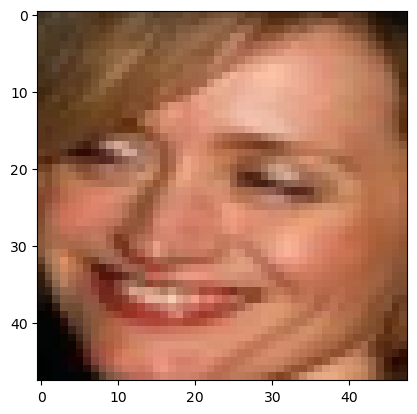

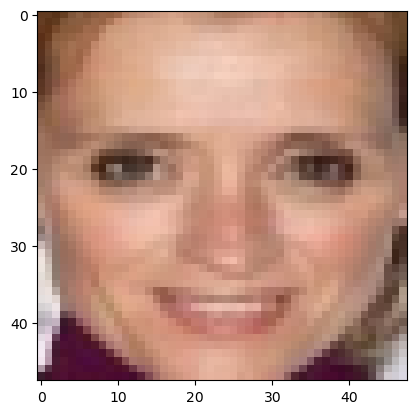

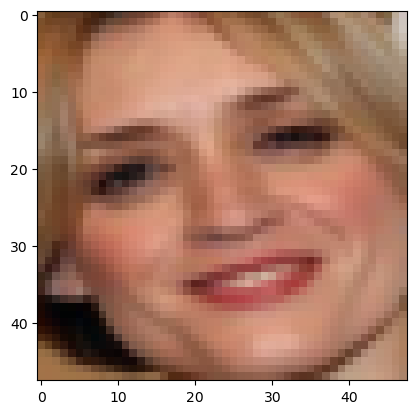

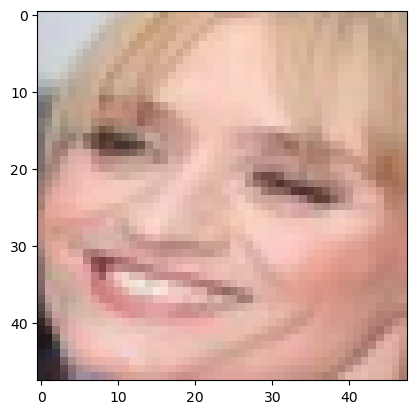

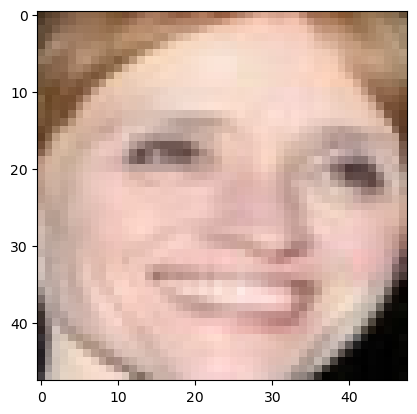

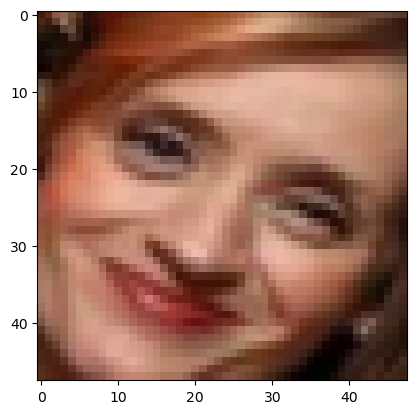

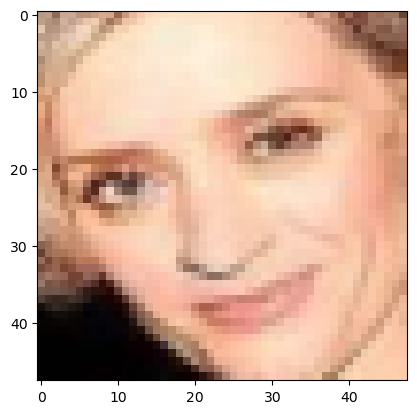

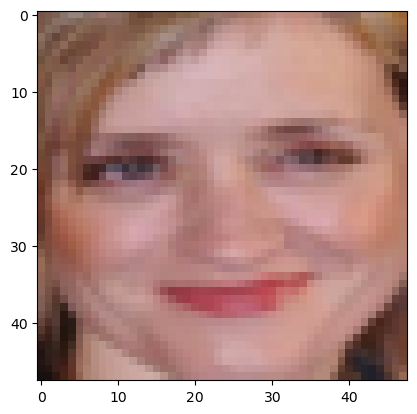

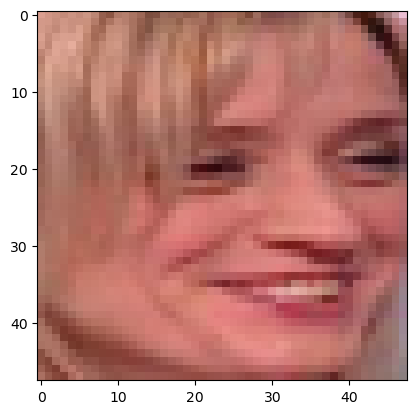

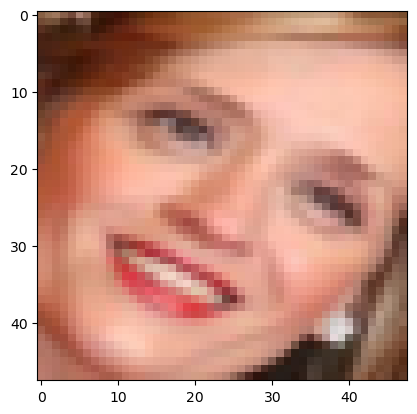

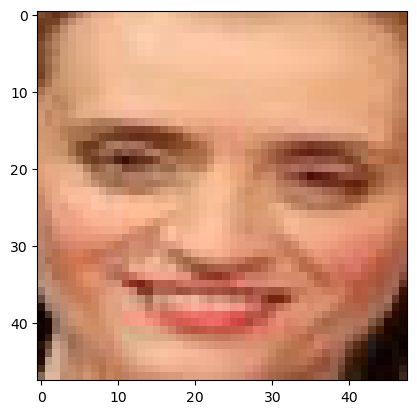

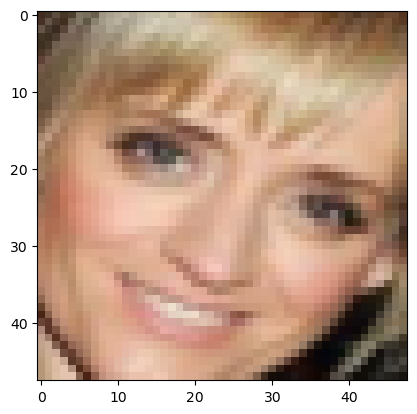

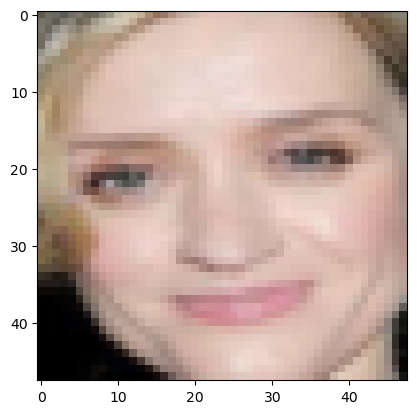

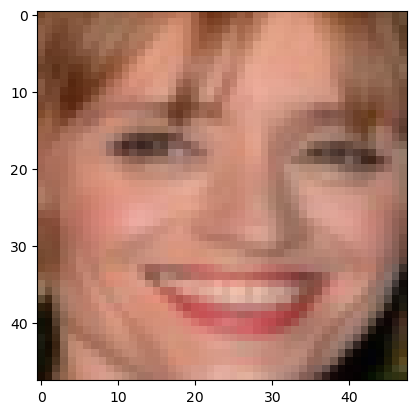

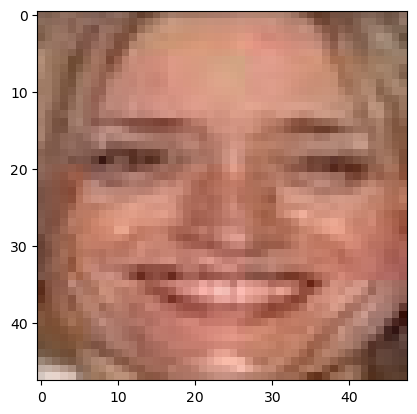

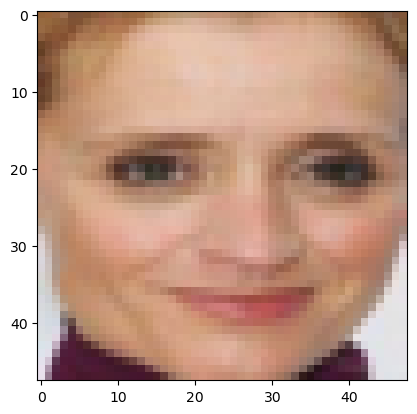

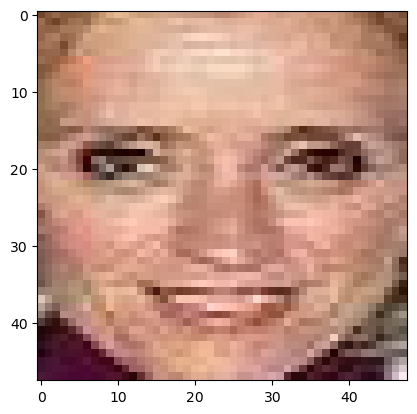

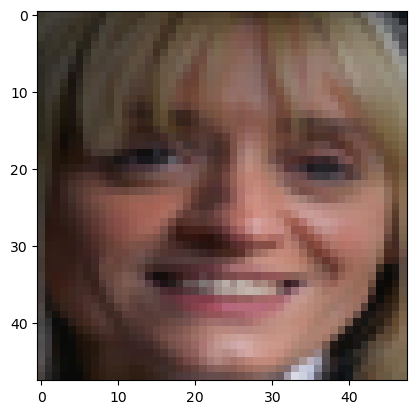

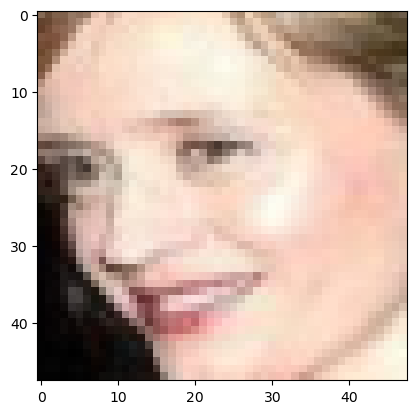

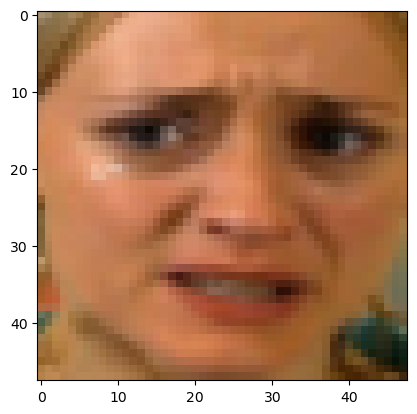

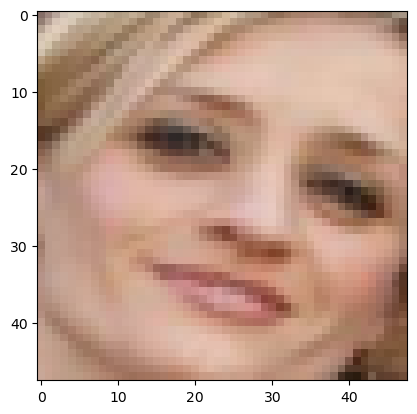

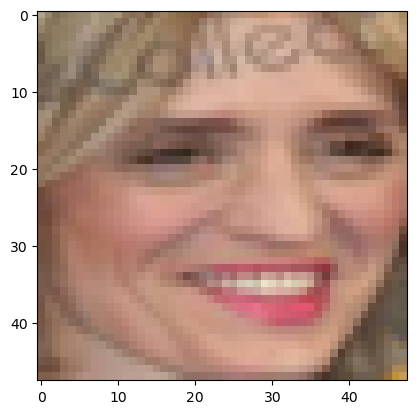

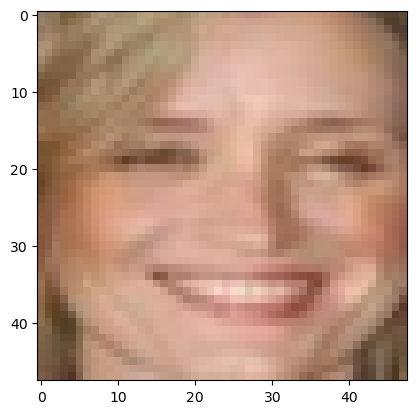

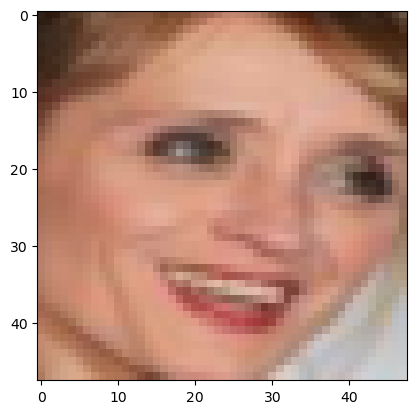

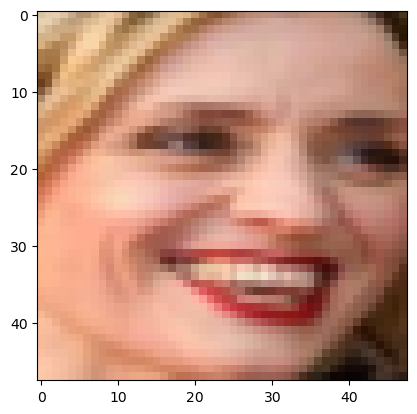

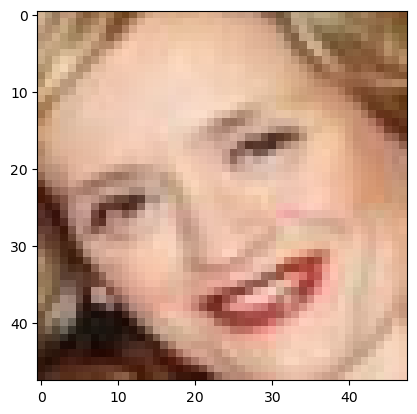

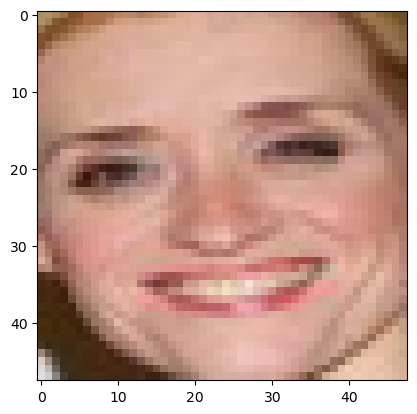

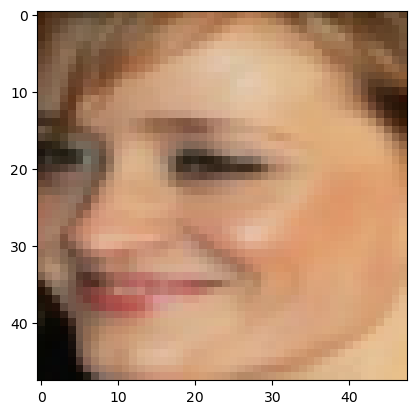

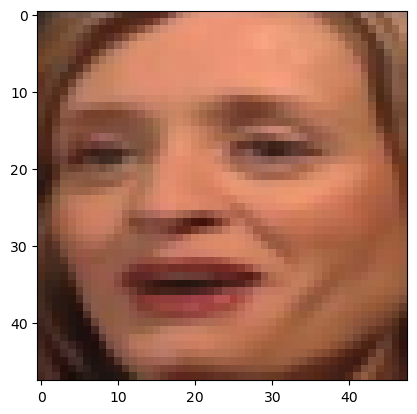

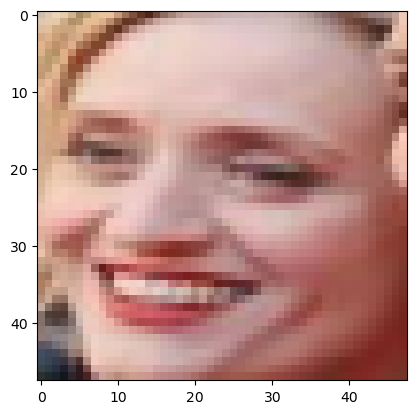

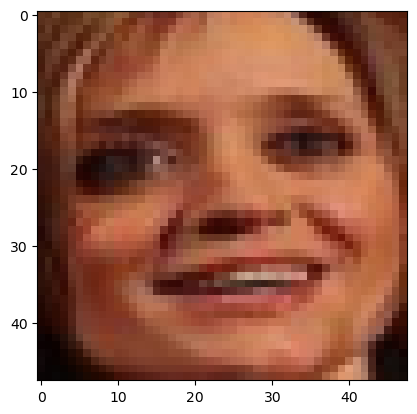

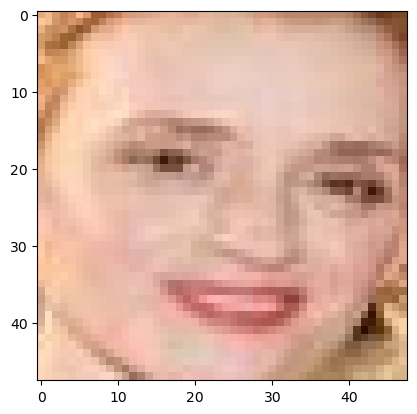

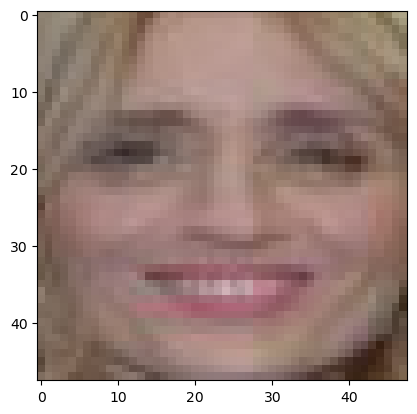

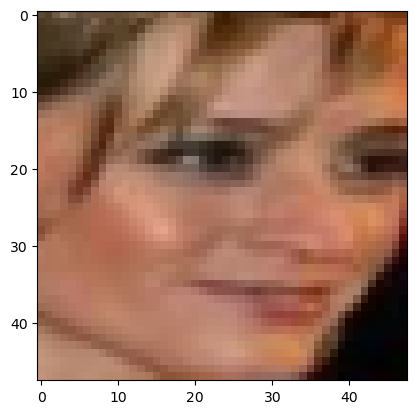

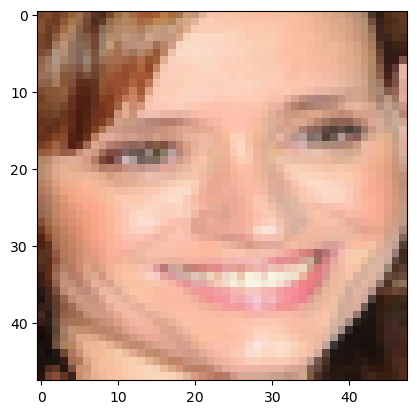

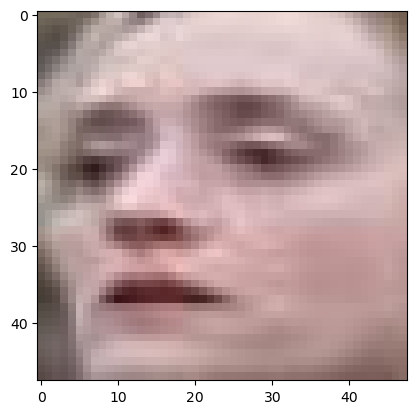

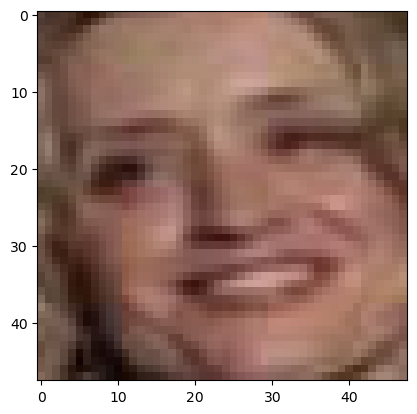

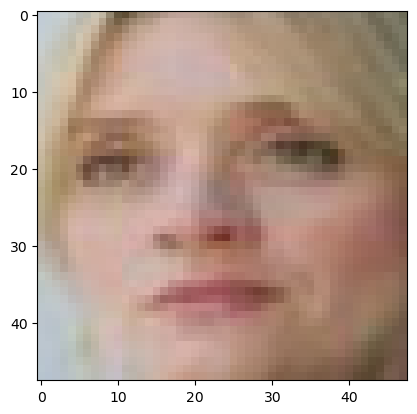

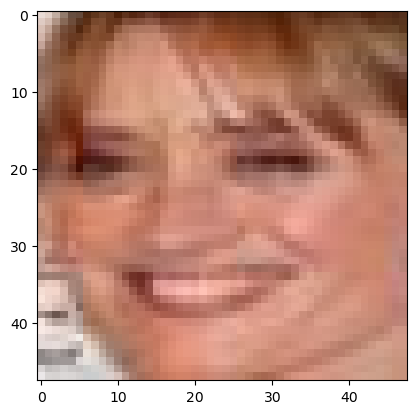

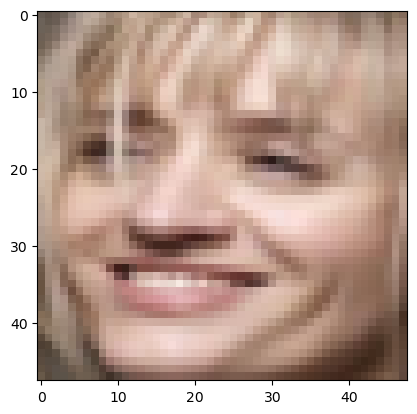

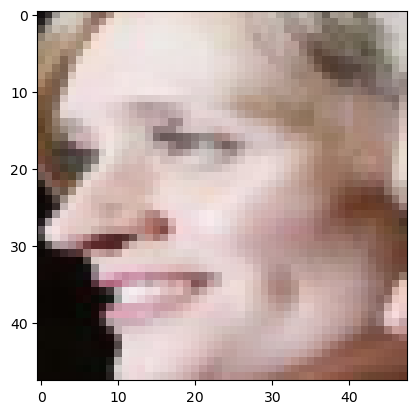

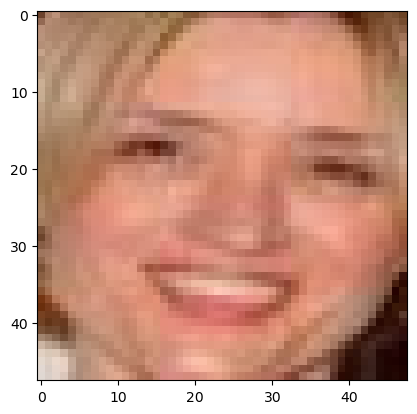

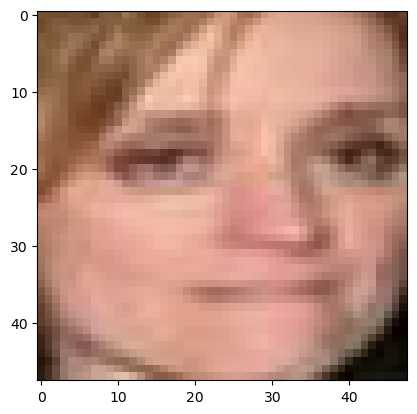

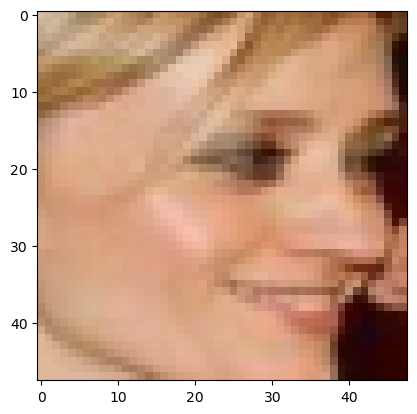

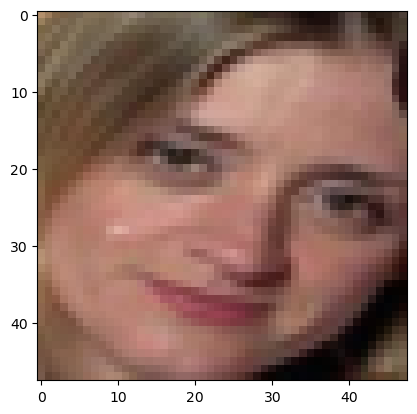

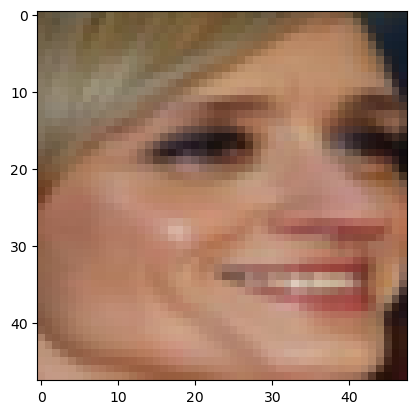

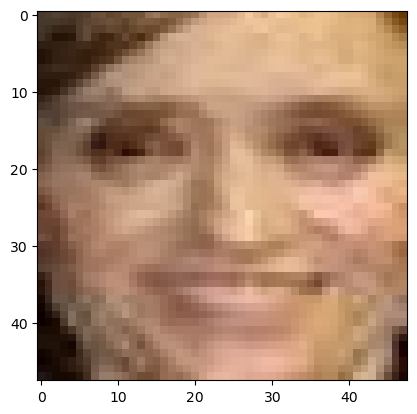

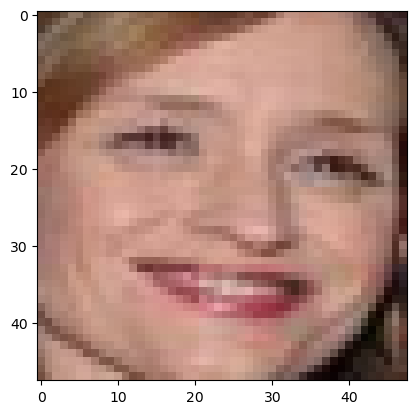

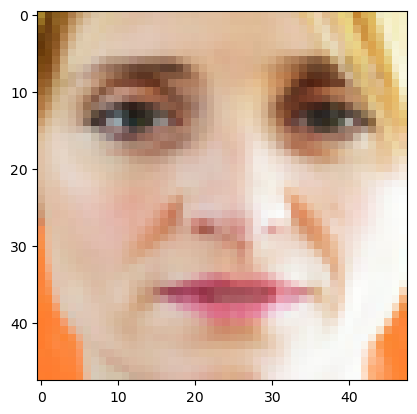

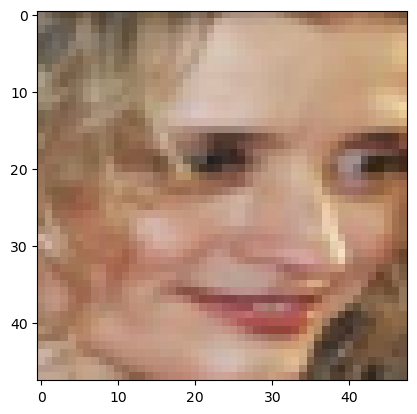

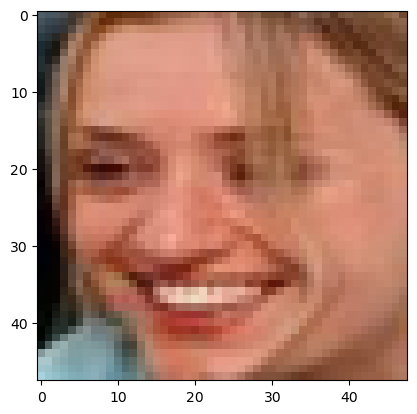

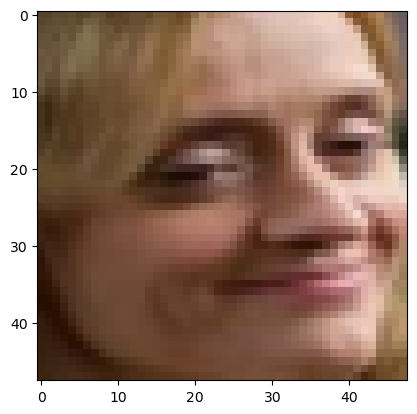

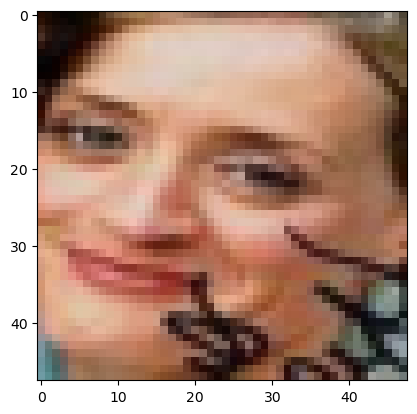

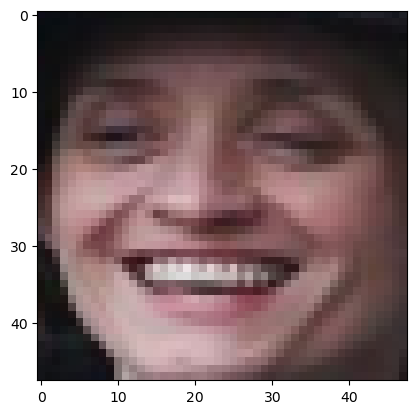

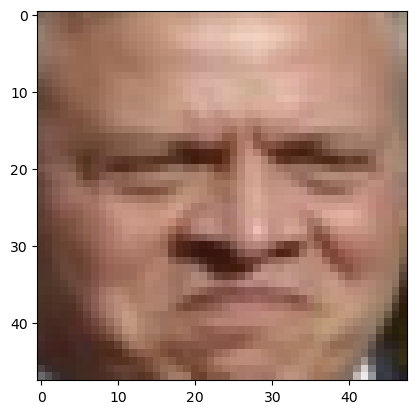

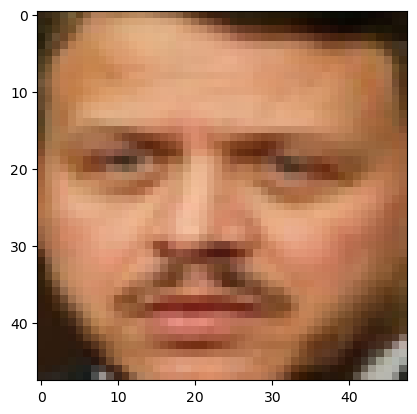

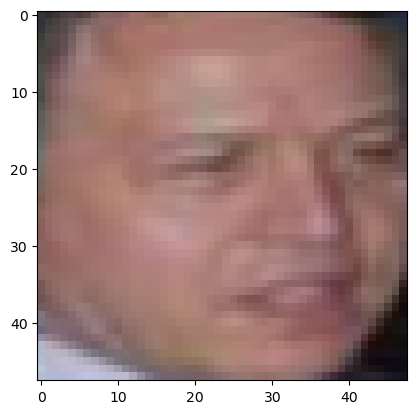

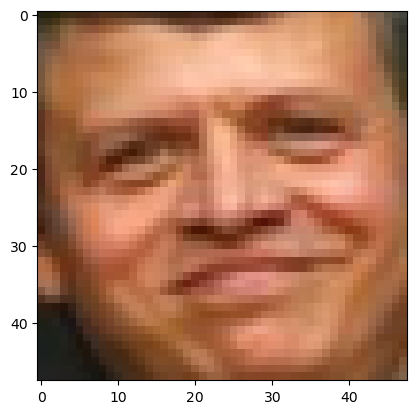

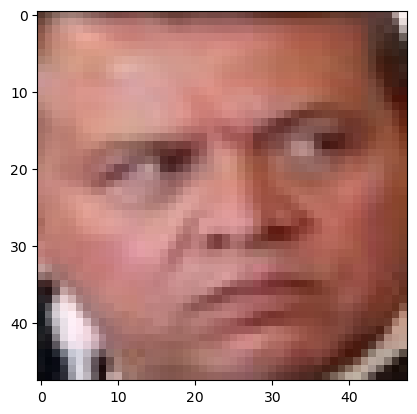

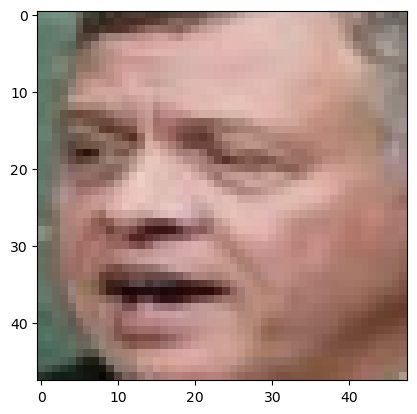

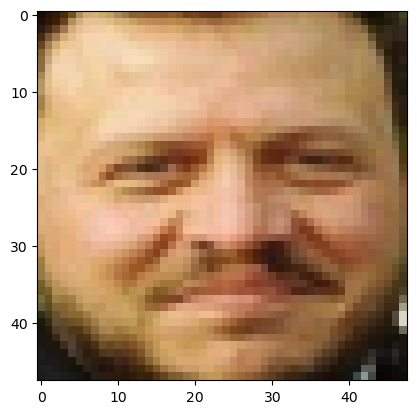

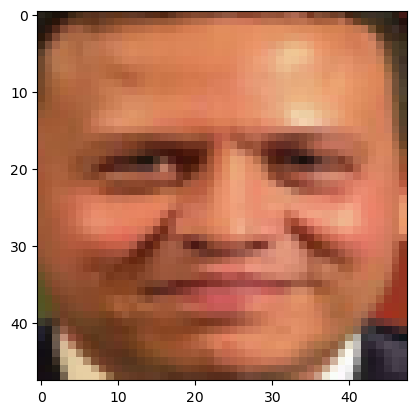

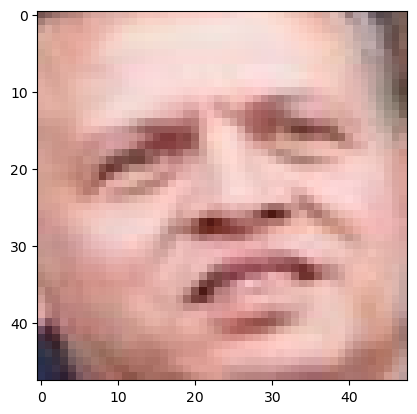

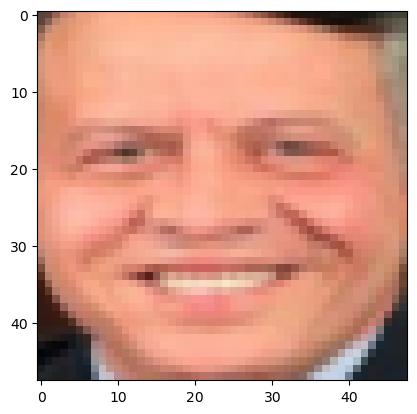

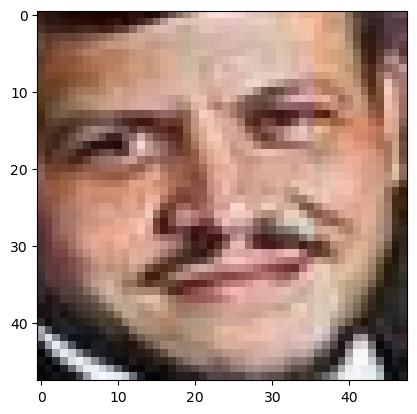

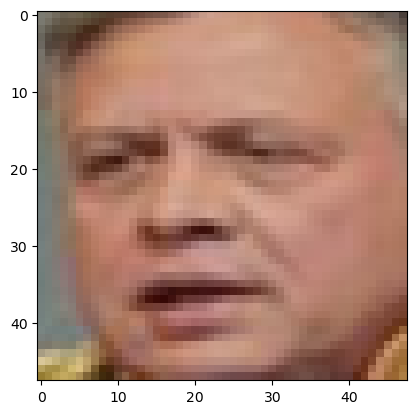

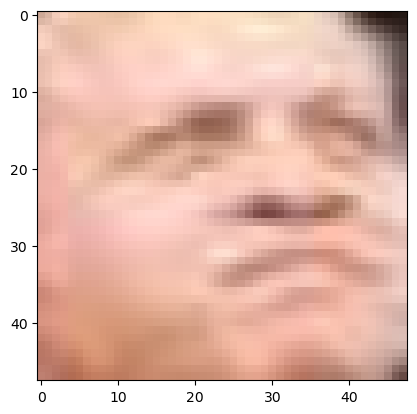

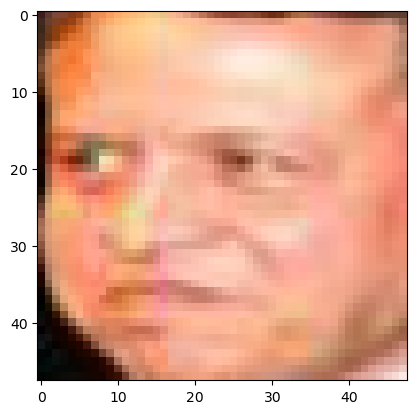

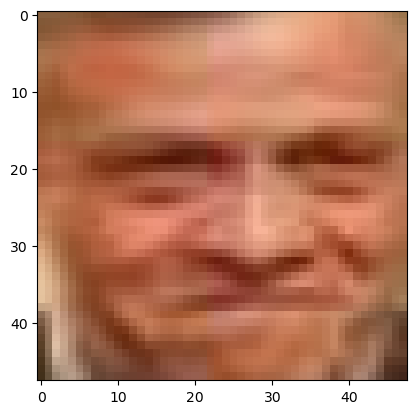

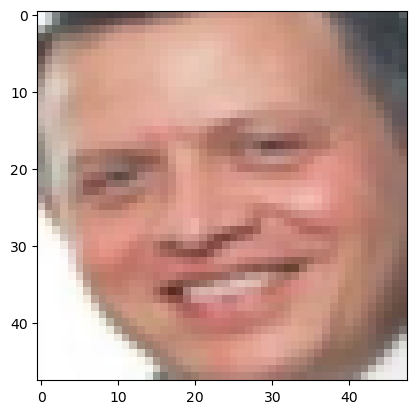

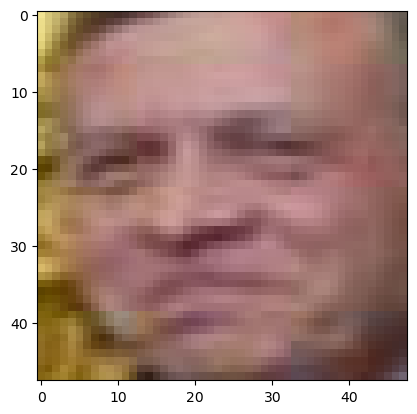

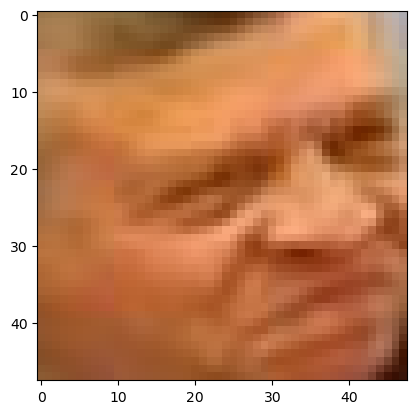

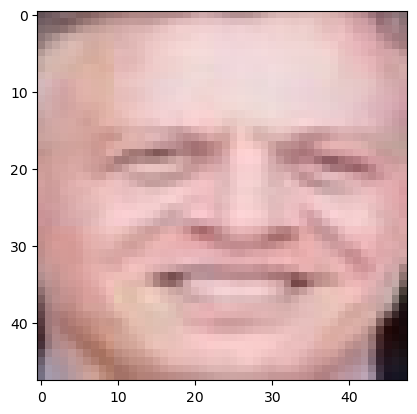

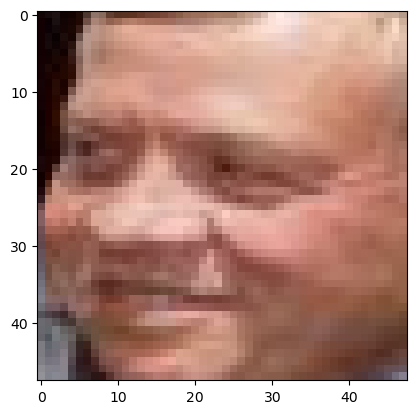

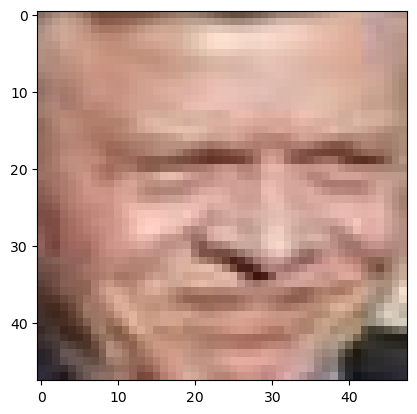

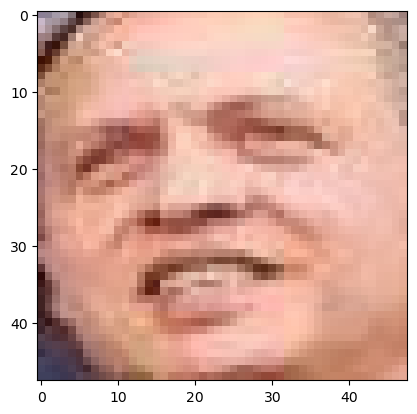

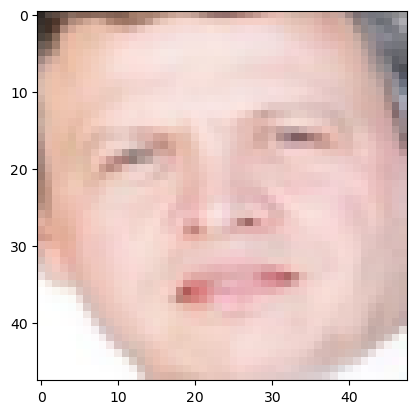

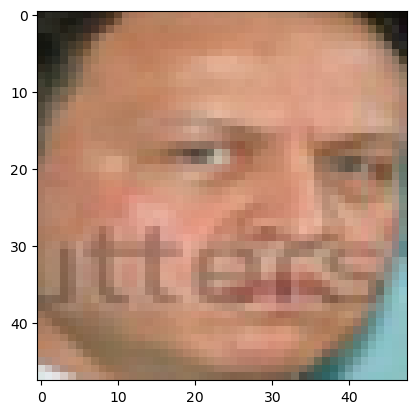

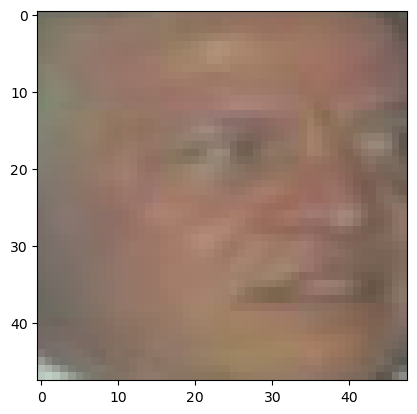

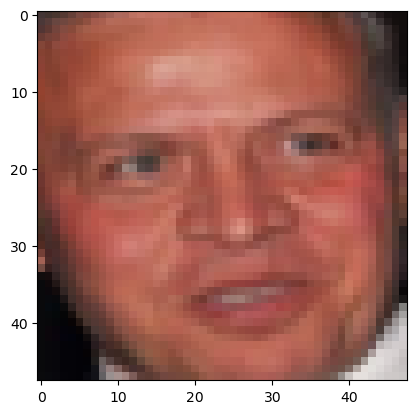

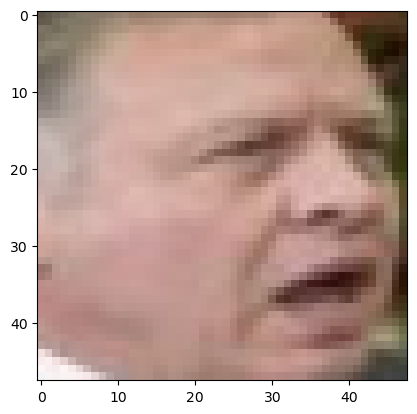

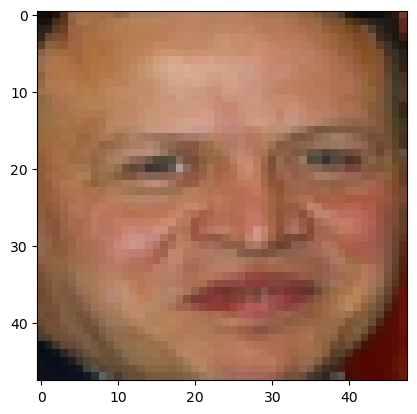

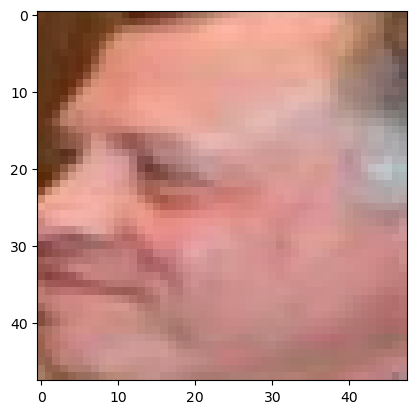

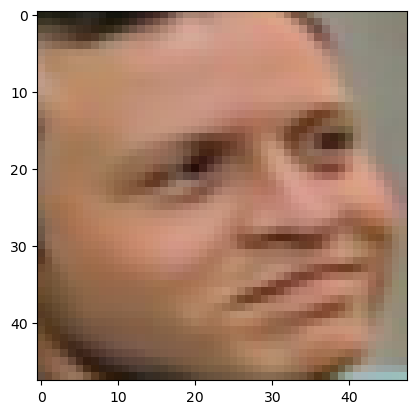

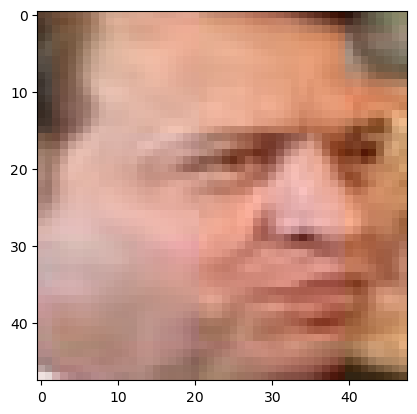

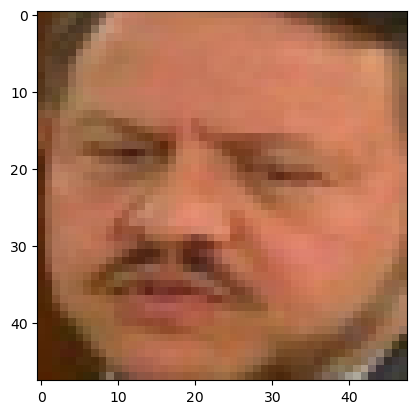

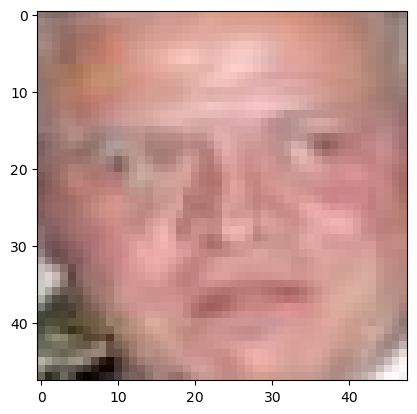

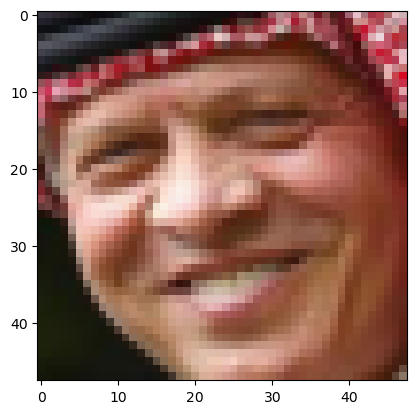

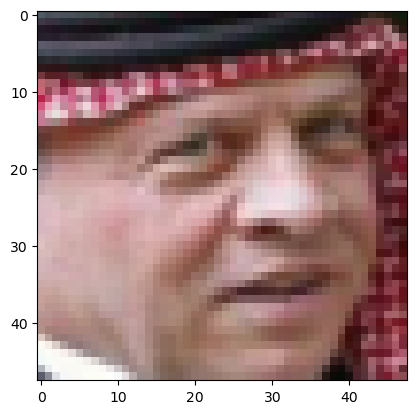

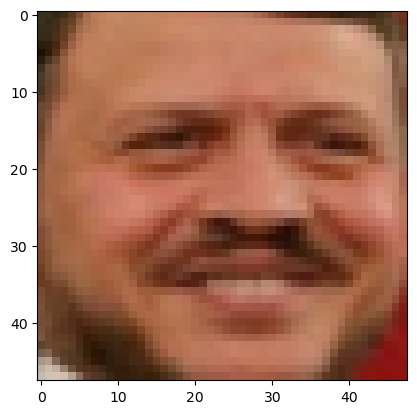

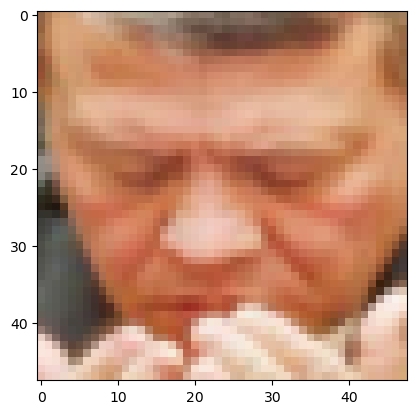

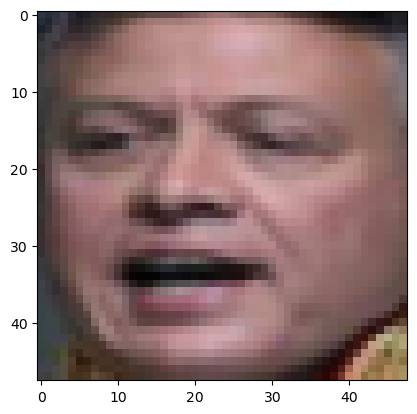

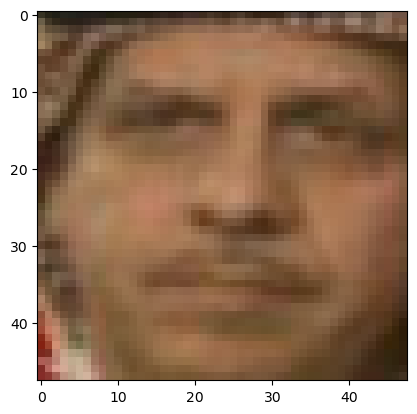

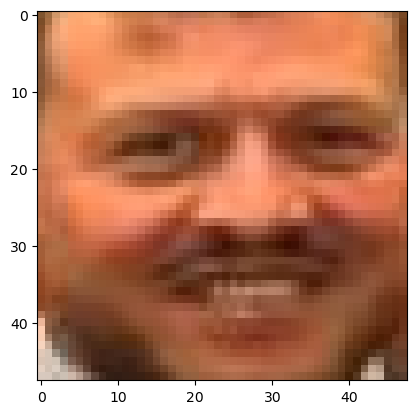

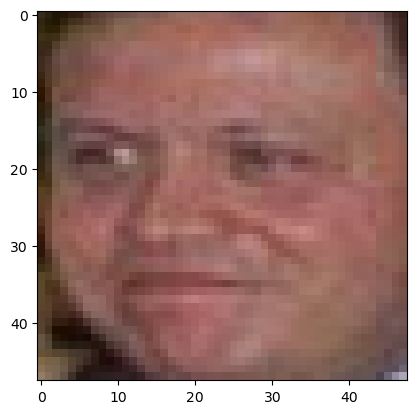

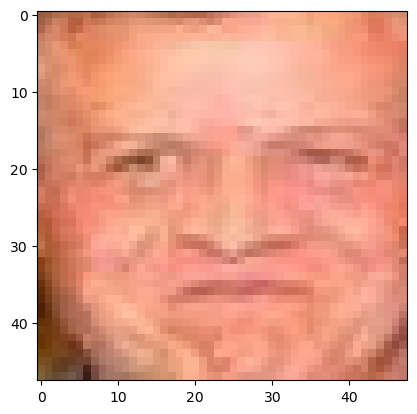

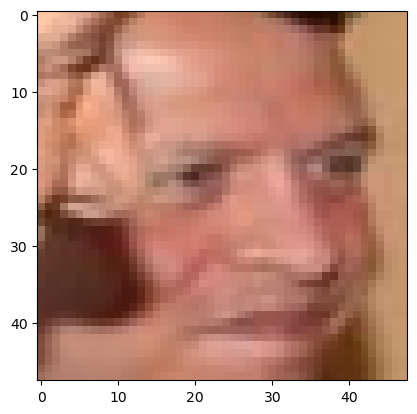

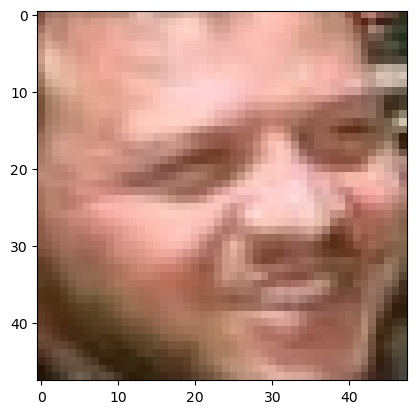

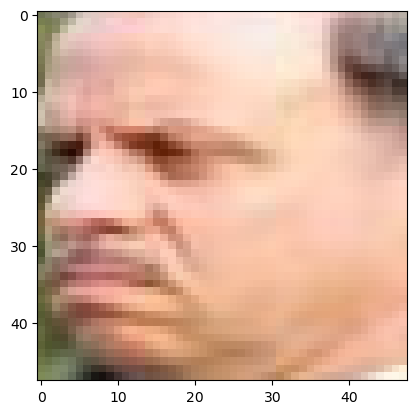

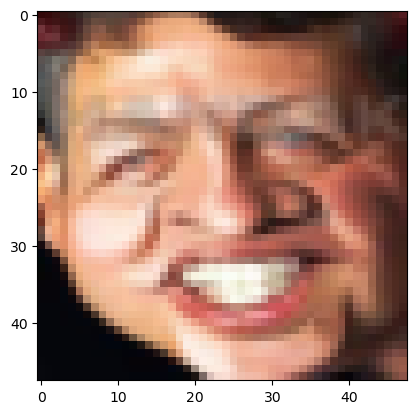

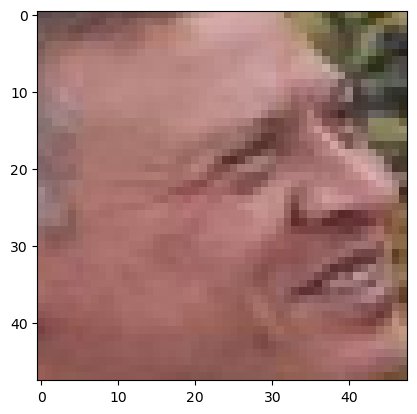

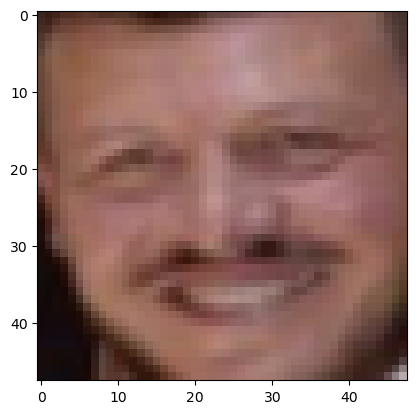

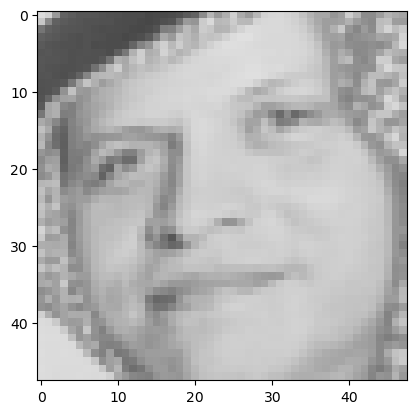

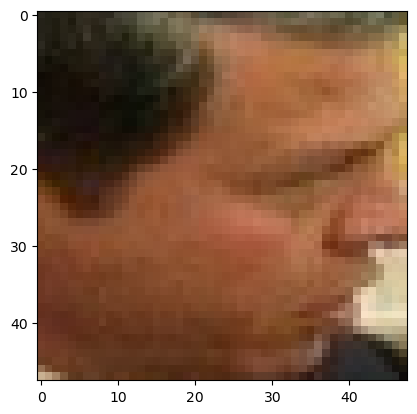

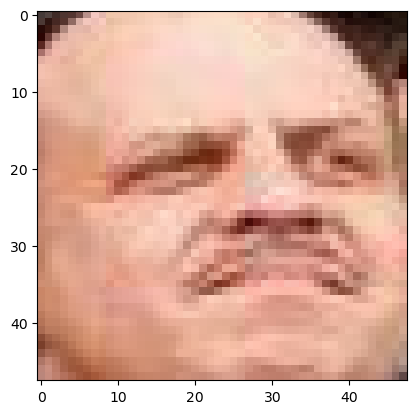

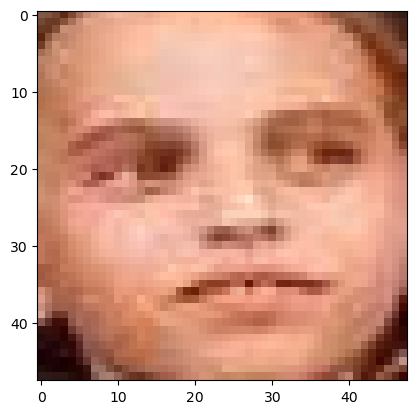

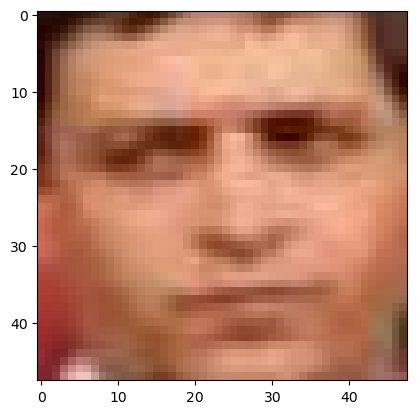

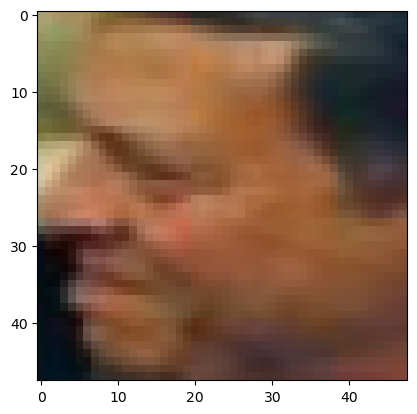

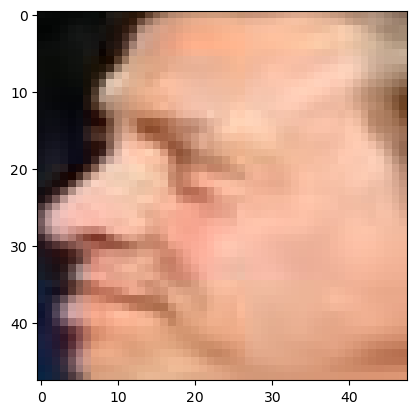

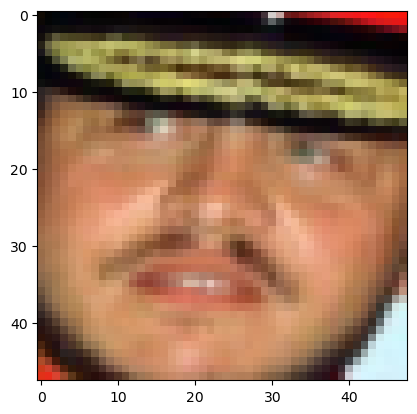

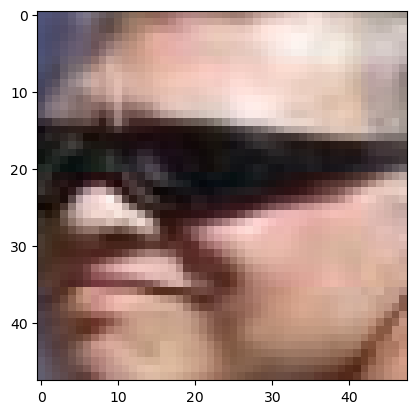

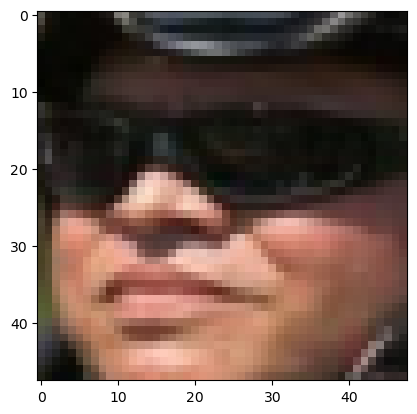

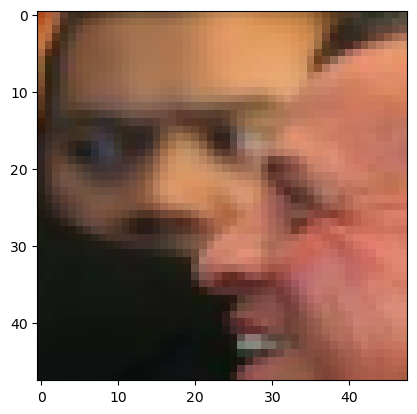

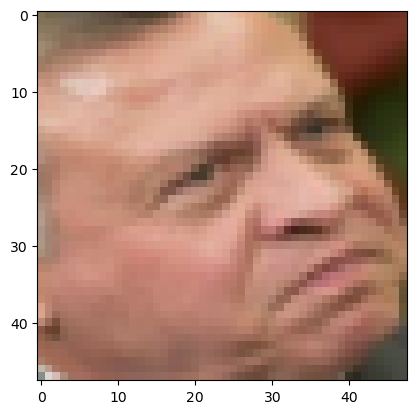

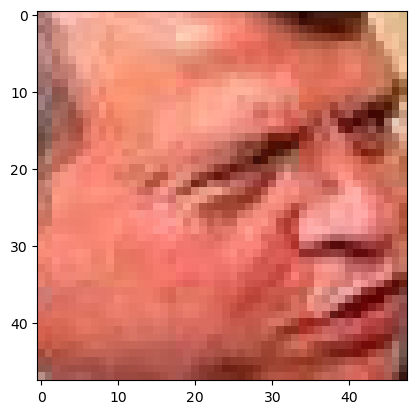

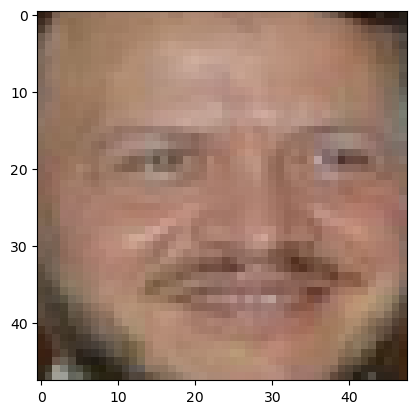

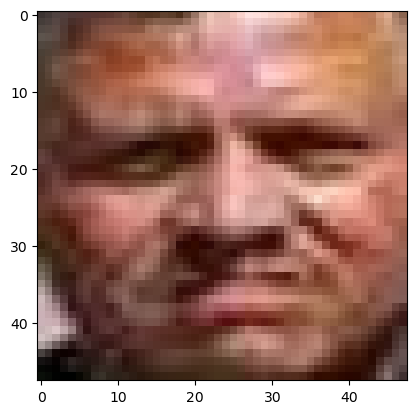

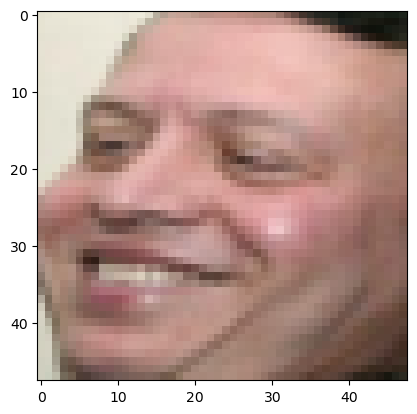

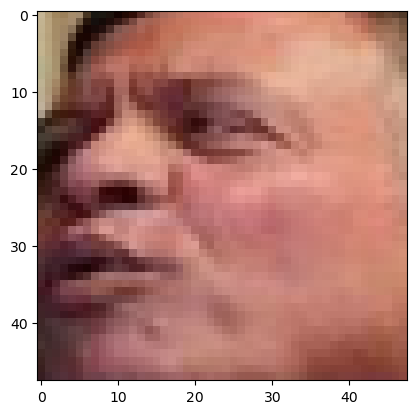

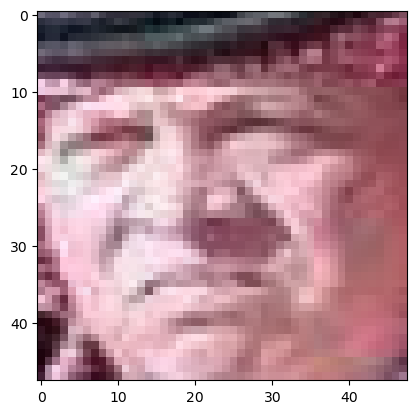

In [65]:
for i in ind_svs:
    sv = train_x[i, :]
    plt.imshow(cv2.cvtColor(sv.reshape(48, 48, 3), cv2.COLOR_BGR2RGB))
    plt.show()

In [66]:
pre_y = clf.predict(test_x)

In [67]:
TP = np.sum((pre_y==1)*(test_y==1))
TN = np.sum((pre_y==0)*(test_y==0))
acc = (TP+TN)/len(test_y)
print('Accuracy is:', acc*100, '%')

Accuracy is: 97.0 %


In [379]:
models = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.1, 1, 10]

In [384]:
accs = []
for C in Cs:
    print('Penalty Length', C)
    for mod in models:
        print('Model', mod)
        clf = make_pipeline(StandardScaler(), SVC(kernel=mod, C=C, gamma='auto'))
        clf.fit(train_x, train_y)
        pre_y = clf.predict(test_x)
        TP = np.sum((pre_y==1)*(test_y==1))
        TN = np.sum((pre_y==0)*(test_y==0))
        acc = (TP+TN)/len(test_y)
        print(acc*100)
        accs.append(acc)

Penalty Length 0.1
Model linear
96.0
Model poly
79.0
Model rbf
84.0
Model sigmoid
86.0
Penalty Length 1
Model linear
96.0
Model poly
83.0
Model rbf
97.0
Model sigmoid
81.0
Penalty Length 10
Model linear
96.0
Model poly
90.0
Model rbf
97.0
Model sigmoid
76.0


# My own SVM

In [311]:
def poly_kernel(x, z, degree, intercept=1):
        return np.power(np.matmul(x, z.T) + intercept, degree)

def gaussian_kernel(x, z, sigma):
    n = x.shape[0]
    m = z.shape[0]
    xx = np.dot(np.sum(np.power(x, 2), 1).reshape(n, 1), np.ones((1, m)))
    zz = np.dot(np.sum(np.power(z, 2), 1).reshape(m, 1), np.ones((1, n)))     
    return np.exp(-(xx + zz.T - 2 * np.dot(x, z.T)) / (2 * sigma ** 2))

def linear_kernel(x, z):
    return np.matmul(x, z.T)

In [346]:
import numpy as np
from cvxopt import matrix, solvers

C = 1
m, n = train_x.shape

In [347]:
K = linear_kernel(train_x, train_x)
# K = gaussian_kernel(train_x, train_x, sigma=1)

In [356]:
# P = matrix(np.matmul(train_y, train_y.T) * K)
# P = np.matmul(train_y, train_y.T) * K
P = np.multiply(np.multiply(train_y, train_y.T), K)
P

array([[ 22., 153., 181., ...,   0.,   0.,   0.],
       [153., 139.,  19., ...,   0.,   0.,   0.],
       [181.,  19., 102., ...,   0.,   0.,   0.],
       ...,
       [229., 186., 176., ...,   0.,   0.,   0.],
       [ 16., 128.,  95., ...,   0.,   0.,   0.],
       [ 45.,  73., 166., ...,   0.,   0.,   0.]])

In [371]:
q = -np.ones((m, 1))
q

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
      

In [372]:
A = train_y.reshape(1, -1)
A

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [373]:
b = np.zeros(1)
b

array([0.])

In [374]:
G = np.vstack((-np.eye(m), np.eye(m)))
G

array([[-1., -0., -0., ..., -0., -0., -0.],
       [-0., -1., -0., ..., -0., -0., -0.],
       [-0., -0., -1., ..., -0., -0., -0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [375]:
h = np.hstack((np.zeros(m), np.ones(m) * C))
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [376]:
P = matrix(P)
q = matrix(q)
A = matrix(A)
b = matrix(b)
G = matrix(G)
h = matrix(h)

In [378]:
solution = solvers.qp(P, q, G, h, A, b, kktsolver='ldl', options={'kktreg':1e-9})
# solution = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -9.7565e+00 -8.0942e+02  4e+03  2e+00  1e-10
 1: -2.9255e+01 -5.3196e+02  2e+03  1e+00  1e-10
 2: -1.7200e+01 -5.3642e+02  2e+03  9e-01  8e-11
 3: -1.4243e+01 -5.3699e+02  2e+03  8e-01  1e-10
 4: -4.0874e+01 -4.6868e+02  2e+03  7e-01  1e-10
 5: -4.9263e+01 -4.6208e+02  2e+03  7e-01  1e-10
 6: -4.1331e+01 -4.6093e+02  1e+03  7e-01  1e-10
 7: -4.1505e+01 -4.6069e+02  1e+03  7e-01  1e-10
 8: -3.3479e+01 -4.6734e+02  1e+03  7e-01  1e-10
 9: -3.8334e+01 -4.5882e+02  1e+03  7e-01  1e-10
10: -3.3788e+01 -4.6322e+02  1e+03  6e-01  1e-10
11: -2.9251e+01 -4.6859e+02  1e+03  6e-01  1e-10
12: -2.9257e+01 -4.6899e+02  1e+03  6e-01  1e-10
13: -2.7841e+01 -4.6903e+02  1e+03  6e-01  1e-10
14: -2.1370e+01 -4.0713e+02  1e+03  5e-01  7e-11
15: -2.1275e+01 -4.0755e+02  1e+03  5e-01  7e-11
16: -1.9939e+01 -4.0984e+02  1e+03  5e-01  7e-11
17: -2.3265e+01 -4.0641e+02  1e+03  5e-01  8e-11
18: -2.3282e+01 -4.0641e+02  1e+03  5e-01  8e-11
19: -2.3225e+01 -4.06

In [361]:
alphas = np.array(solution['x'])
ind = (alphas > 1e-4).flatten()
sv = train_x[ind]
sv_y = train_y[ind]
alphas = alphas[ind]
len(alphas)

273

In [362]:
b = sv_y - np.sum(gaussian_kernel(sv, sv, sigma=1) * alphas * sv_y, axis=0)
# b = sv_y - np.sum(linear_kernel(sv, sv) * alphas * sv_y, axis=0)
b = np.mean(b)
b

0.4908424908424908

In [363]:
alphas = np.reshape(alphas, [-1, 1])

In [364]:
sv_y = np.reshape(sv_y, [-1, 1])

In [365]:
sv = np.multiply(sv, alphas)

In [366]:
sv = np.multiply(sv, sv_y)

In [367]:
# prod = np.sum(gaussian_kernel(sv, train_x, sigma=1), axis=0) + b
prod = np.sum(linear_kernel(sv, train_x), axis=0) + b
predictions = np.sign(prod)

In [368]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.